# Week 3:CH04 LINEAR METHODS FOR CLASSIFICATION

### 2020-04-16 ESC 2020-1 학술부장 강경훈

<font color='grey'><i>
원래 Latex으로 하다가 그냥 markdown으로 해봤는데, 슬라이드 크기 신경 안 써도 되고 맘대로 주저리주저리 떠들 수 있으니 이게 더 적성에 맞는듯. 사실 이건 내가 공부하려고 그냥 편한대로 쓴 노트필기다. 전체적인 흐름과 세부적인 증명은 세션과 학술부원이 준비한 세션 슬라이드를 위주로 공부하되, 아래는 코드만 줍줍하고 설명은 나무위키처럼 써놨으니 그냥 참고만 하자.
</i></font>

## 1. Classification and Test Error Rate

데이터 $x_i$에 대해 target 변수 $t_i$가 범주형 자료인 경우 (남자/여자, 성공/실패, 양념/간장/후라이드) 우리가 세우는 예측 모델 $f$을 Classifier라고 한다.

$$ Classifier:\; \hat{t_i} = f(x_i)$$

당연히 우리의 모델 $f$는 종종 틀릴 것이다. Regression에서는 우리가 Error를 예측값과 실제값 사이의 거리의 제곱을 오차로 정의했다면, Classification은 좀 더 간단하게 **전체 데이터에서 틀리게 분류된 횟수**로 Error를 정의한다. 자세히 말하자면 아래와 같은 Indicator function을 만들어놓고

$$ Classification\;Error:\;
    I(t_i \neq \hat{t_i}) =
        \begin{cases}
            0 & \text{if } t_i = \hat{t_i} \\
            1 & \text{if } t_i \neq \hat{t_i}
        \end{cases}
$$

이걸 Test set에다가 돌려 틀린 횟수의 비율을 계산해서 Test Error Rate이라고 하는 것.

$$ Test\; Error\; Rate:\; \frac{1}{N}\sum_{i=1}^{N}I(t_i \neq \hat{t_i}) $$

Regression에서 구한 Mean Squared Error $MSE = \frac{1}{N}\sum_i^N (t_i - f(x_i))^2$가 Expected Loss $E[t - f(x)] $의 추정치라는 것은 다들 기억하실 것이다! 이와 마찬가지로 Test Error Rate 또한 Expected Error Rate의 추정치이다.

$$ Expected\;Error\; Rate:\; E[I(t \neq \hat{t})] $$

Regression 때와 마찬가지로 Classification 때도 우리의 목적은 바로 이 Expected Error Rate을 최소화하는 모델 $f$를 구하는 것이다. Regression 때 우리는 만일 $p(x, t)$의 결합 분포를 알고 있다고 하면 $f(x_i) = E[t_i|x_i]$으로 할 때 Expected Loss가 가장 최소화된다는 것을 배웠다. 이와 마찬가지로 Classification 때도 $f(x_i) = P[t_i|x_i]$에 따라서 분류를 하면 Expected Error Rate가 최소화된다. 예컨대 키를 보고 남녀 성별을 분류하는 문제라면, 키가 180일 때 남자일 확률 p(남자|키180)이 p(여자|키180)보다 높다면 키 180인 관측치 $x_i$는 남자로 분류하는 것. 이처럼 $x_i$가 주어졌을 때 Class $t_i$의 조건부 분포를 __Bayes Classifier__ 라고 부른다.

$$Bayes\;Classifier:\; \hat{t_i} = f(x_i) = \arg\max_{C_k} p[C_k|x_i] $$
$$ (t_i \in \{C_1, C_2, ..., C_K\}) $$

이렇게 분류를 하면 항상 족족 다 들어맞을까? 아니다. 우리의 target $t_i$은 확률변수이기 떄문에, 틀릴 수도 있다. 예컨대 키가 180일때 남자일 확률이 0.8이고, 키가 180일때 여자일 확률이 0.2이여서 키가 180인 사람을 남자로 분류했다고 하자. 그러나 10번 중에 2번은 여자가 있을 것이니, 그만큼은 틀릴 것이다. __이처럼 확률 변수를 정확히 하나의 값(범주)로 분류를 하기 떄문에 어쩔 수 없이 발생하는 에러__ 가 있을 것인데, 이를 Bayes Error Rate이라고 한다. 이는 줄일 수 없는 에러이니 Baseline Error라고 부르기로 방금 내가 정했다.

$$ Bayes\;Error\;Rate: = 1 - E[\max_{C_k} p[C_k|x_i]]$$

<br>
<br>

### 1-1. Bayesian Decision Boundary and Baseline Error: Visual Inspection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

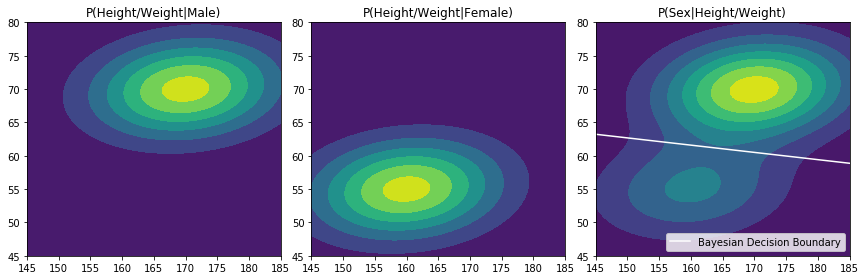

In [2]:
### Define Joint Distribution p(C,x) = p(C)p(x|C)
## Set p(C)
male = 0.7; female = 0.3

## Set P(x|C): height & weight of male and female
mu_male = np.array([170, 70]); mu_female = np.array([160, 55])
sigma = np.array([[10**2, 0.5*5*2.5],[0.5*5*2.5, 5**2]])
HW_male = multivariate_normal(mu_male, sigma)
HW_female = multivariate_normal(mu_female, sigma)

## Get Joint Distribution p(C,x) = p(C)p(x|C)
# some messy prep works
ht = np.linspace(145, 185, 500); wt = np.linspace(45, 80, 500)
H, W = np.meshgrid(ht, wt); pos = np.dstack((H,W))
# use p(C,x) = p(C)p(x|C)
HW_sex = HW_male.pdf(pos) * male + HW_female.pdf(pos) * female

### Visualize p(C,x) = p(C)p(x|C)
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
ax1.contourf(H, W, HW_male.pdf(pos))
ax1.set(title='P(Height/Weight|Male)')

ax2 = fig.add_subplot(132)
ax2.contourf(H, W, HW_female.pdf(pos))
ax2.set(title='P(Height/Weight|Female)')

ax3 = fig.add_subplot(133)
ax3.contourf(H, W, HW_sex)
ax3.set(title='P(Sex|Height/Weight)')

# plot Bayesian Decision Boundary
inv = np.linalg.inv
m1 = np.matrix(mu_male).T; m2 = np.matrix(mu_female).T
w = inv(sigma) @ (m1 - m2)
w0 = -0.5 * m1.T @ inv(sigma) @ m1 + 0.5 * m2.T @ inv(sigma) @ m2 + np.log(male/female)
bdb = -w0/w[1] - w[0]/w[1] * ht
ax3.plot(ht, bdb.T, label='Bayesian Decision Boundary', color='white')
ax3.legend(loc='lower right')

fig.tight_layout()

Bayes Classifier로 분류로 하는 경우 데이터의 영역은 $p[C_k|x_i]$ $(t_i \in \{C_1, C_2, ..., C_K\})$가 같은 지점을 기준으로 나눠지게 되는데, 이를 __Bayesian Decision Boundary__ 라고 부른다. 이 베이지안 디시젼 바운더리는 쉽게 말하면 데이터 공간이 D차원일때, D차원을 가로지르는 D-1 차원의 선/면/공간, 즉 __Hyperplane__ 으로 생각할 수 있다. 위의 경우 우리는 데이터의 분포를 완전히 알고 있으므로 베이지안 디시젼 바운더리를 그릴 수 있지만, 실제로는 그릴 수 없으므로 이 Decision Boundary를 추정해야 한다. 이처럼 Classification은 결국 D 차원의 데이터 공간을 분할하는 방법이라고 보아도 무방하며, 수많은 Classification 방법은 결국 어떤 방법으로 이 직선을 그리는 것인가로 귀결된다.

지금 내가 말하고 싶은 것은, 아무리 기깔나게 우리가 선을 잘 그려도, 꼭 몇 개씩 틀리는 게 있을 수 밖에 없으며, 그것이 Bayes Error Rate이라는 것이다. 이걸 보이기 위해 실제로 위 분포를 따르는 데이터를 생성해보자.

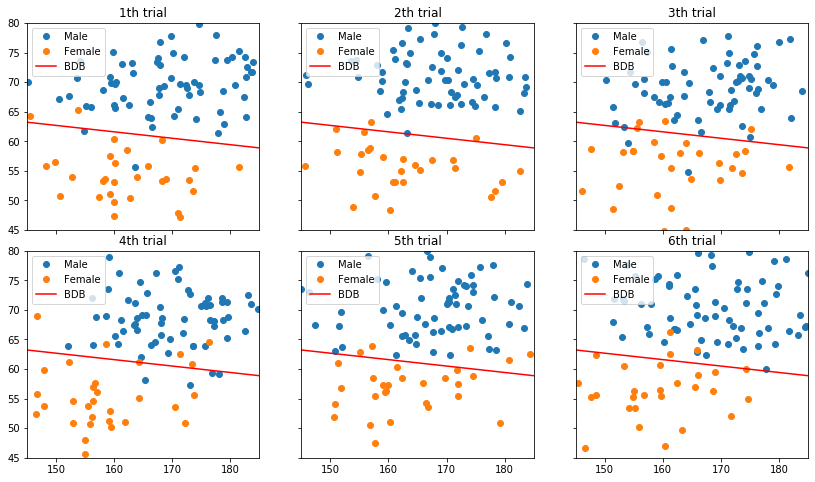

In [3]:
N = 10000

fig, axes = plt.subplots(2,3, sharey=True, sharex=True, figsize=(14,8))
fig.subplots_adjust(hspace=0.1, wspace=0.18)
for i, axi in enumerate(axes.flat, 1):
    
    # Generate samples of male/female
    N_male = int(100 * male); N_female = int(100 * female)
    male_data = HW_male.rvs(N_male)
    female_data = HW_female.rvs(N_female)
    
    # Plot results
    axi.set(xlim=(145, 185), ylim=(45, 80), title='{0}th trial'.format(i))
    axi.plot(male_data[:,0], male_data[:,1], linestyle='', marker='o', label='Male')
    axi.plot(female_data[:,0], female_data[:,1], linestyle='', marker='o', label='Female')
    axi.plot(ht, bdb.T, label='BDB', color='red')
    axi.legend(loc='upper left')

&nbsp;&nbsp;&nbsp; 위에서 p(남녀, 키와몸무게)의 분포의 모수를 다르게 설정하면 (남자의 비율을 낮춰본다, 남자 키의 평균을 옮겨본다, 여자 몸무게 분산을 높여본다 등등) 얼마든지 다른 Bayesian Decision Boundary가 나올 수 있다. 당연히 두 분포가 서로 가까울수록, 즉 겹치는 부분이 많을수록 BDB를 넘는 데이터도 많이 나올 것이다. 

<br>
<br>

### 1-2. Methods of Classification

&nbsp;&nbsp;&nbsp;이처럼 우리는 Classification이란 결국 데이터 스페이스에 바운더리를 그리는 것이라는 점을 이해했다. 이렇게 바운더리를 그리는 방법에는 선형 방법과 비선형 방법이 있는데, 이름에서 보듯 비선형 방법일수록 좀 더 복잡한 바운더리를 그릴 수 있다. 혹은 단순한 바운더리를 하나 그려놓고, 그 바운더리를 또 여러 개 더 그려 합치는 방법도 있다. 앞으로 이걸 다 배울거다. 너무 신나지 아니한가! 아래는 Classification 방법들의 예이다. 결국은 어떤 바운더리를 어떻게 그릴 것인가의 문제.

<img src="https://raw.githubusercontent.com/YonseiESC/ESC20-SPRING/master/%EC%84%B8%EC%85%98%20%EC%9E%90%EB%A3%8C/week3/snip01.PNG" width="700">
<center><figcaption> 출처: https://cedar.buffalo.edu/~srihari/CSE574/ (여기 PRML 슬라이드 되게 좋음)</figcaption>

<br>
<br>

## 2. Linear Methods of Classification

&nbsp;&nbsp;&nbsp;오늘 우리가 공부할 방법은 __Linear Methods for Classification__, 즉 선형 방법을 배울 것이다. 선형 분류방법이란 결국 우리가 그릴 boundary, 어려운 말로 discriminant를 데이터 $\mathbf{x}$, 혹은 데이터의 어떤 변형(feature) $\phi(\mathbf{x})$에 대한 선형 식으로 나타낼 수 있다는 말이다.선형 방법에서 Discriminant가 곧 Decision Boundary이므로, 지금부터는 바운더리 대신 Discriminant라는 말을 쓰겠다. 

&nbsp;&nbsp;&nbsp;선형 Regression에서는 예측값이 데이터의 선형 결합인 모델을 가정하였다. ($\hat{t_i} = \mathbf{w}^T \mathbf{x} + w_0$) 이와 마찬가지로 이번 장에서 볼 선형 Classification은 Discriminant가 선형인 모델을 말한다. 

$$ Discriminant:\; y(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + w_0=0$$

식을 보면 알겠지만 Discriminant는 x가 D차원일 때 그 공간을 둘로 나누는 D-1 차원의 Hyperplane으로 볼 수 있다. $\mathbf{w}^T \mathbf{x}$가 특정한 값 $-w_0$인 점들의 모임이니, 1차원에서는 점, 2차원에서는 직선, 3차원에서는 평면이 되는 것이다. 때문에 이 Discriminant를 그리는 것은 계수 $\mathbf{w}^T$와 $w_0$을 결정해 Hyperplane을 결정하는 것과 같다. 이를 결정하는 방법은 크게 세 가지가 있다.

<br>
<br>

### 2-1. Discriminant Approach

1. **Discriminant Approach**: <br>
    Discriminant의 의미에 충실하게 데이터고 확률변수고 뭐고 그냥 직선 그리는 방법이다. 확률의 ㅎ자도 안 들어간다. 참 단순한 녀석들.
    1. **Least Squares**: 오차가 가장 적은 방향으로 Discriminant를 그리는데, Regression과 차이점은 target이 벡터 (예컨대 $[0,1,0,0]$ 이런 식)라는 점. 딱히 좋은 방법도 아니고 쓸데없이 복잡하니 그냥 skip
    1. **Fisher's Linear Discriminant**: 범주 내의 평균들을 이은 직선을 그리되, 그 직선에 투영된 데이터의 히스토그램이 최대한 덜 겹치게 옆으로 이리저리 틀어보자는 방법. 이것도 복잡하니까 그냥 skip
    1. **Perceptron**: 얘는 좀 신기하다. 일단 아무 직선이나 그어보고, 잘못 분류된 애들을 순차적으로 고려해서 조금씩 조금씩 고쳐나가는 방법인데, 지 혼자 알아서 이리저리 자리를 찾아가는 모습을 보면 참 귀엽다. 여러 Perceptron을 합치면 다양한 모양의 바운더리를 그릴 수 있다는 것을 나중에 Adaboost를 배울 떄 볼 것이다.

#### 2-1-1. Perceptron in Python

In [4]:
# To be completed...

<br>
<br>

### 2-2. Probabilistic Generative Approach

2. **Probabilistic: Generative (Undirect) Approach** <br>
    데이터를 확률변수로 보고, 데이터의 형성과정에 대한 분포를 가정하는 방식이다. 사실 이 방법은 아까 BDB를 그릴 때 코드에서 이미 봤다. 먼저 각 범주의 확률$p(C_k)$을 추정하고(남자의 비율과 여자의 비율), 각 범주 안에서 데이터의 분포 $p(\mathbf{x}|C_k)$를 가정해서 (남자/여자들의 키와 몸무게의 분포, 아까는 정규분포를 가정), 다른 모든 범주 가운데 어떤 범주에 있을 때 이 데이터가 가장 Likely를 한지를 보는 방법이다. 이처럼 마치 데이터를 형성하는 것과 같다고 해서 Generative라고 부르는 것 같다. 베이즈 정리에 충실한 해석이다. 
    
    $$ p(C_k|\mathbf{x}) = \dfrac{p(\mathbf{x}|C_k)p(C_k)}{\sum_j p(\mathbf{x}|C_j)p(C_j)} $$
    
    Generative 모델은 각 범주 별 데이터의 분포인 **class conditional density ($p(\mathbf{x}|C_k)$)**를 어떻게 가정하냐에 따라 다음과 같이 분류한다.

    1. **Naive Bayes Classifier**: 데이터의 각 설명변수 혹은 feature가 독립이라고 가정하는 방법이다. 즉 남자의 키와 몸무게는 독립이라는 것. 이렇게 되면 class conditional density가 굉장히 간단해진다. $p(\mathbf{x}|C_k) = p(x_1|C_k)p(x_2|C_k)...p(x_K|C_k)$ 때문에 분포도 연속형이면 단일변수 정규분포, 이산형이면 베르누이, 멀티노미얼 등등을 가정할 수 있다. 그러나 각 feature가 정말로 독립인 경우는 아주 희박하기 때문에 Naive한 가정이라는 의미에서 Naive라고 부른다.
    2. **Linear Discriminant Analysis (LDA)**: Class conditional density를 다변수 정규분포로 가정하는 모델이다. 즉 각 범주별 데이터의 분포가 다변수 정규분포라는 것인데, 모델의 간소화를 위해 범주별 데이터 분포의 공분산행렬이 모두 같다고 가정한다. 그러니까 $\mu_k$는 모두 달라도, $\Sigma$는 같다는 것. 이렇게 되면 Discriminant는 선형이 된다.
        이처럼 $p(\mathbf{x}|C_k)=\mathcal{N}(\mu_k, \Sigma)$로 가정했으니, $\mu_k, \Sigma$를 어떻게 추정할까? 책을 보면 MLE 추정량이 결국 범주에서의 데이터의 표본평균과 모든 범주에 거친 데이터의 표본공분산이라는 것을 보이는 증명이 있다. 그 증명 과정이 MVN의 MLE를 구하는 방법과 거의 같은데, 이는 애초에 LDA가 class conditional density를 정규분포로 가정했으니 전체 Likelihood도 두 정규분포 pdf의 곱이 되기 때문이다. 벡터및행렬미분 슬라이드 마지막에 보면 MVN의 MLE를 구하는 과정을 상세히 서술해놨으니 한번 참조해보자. (직관적으로 이해되면 정신건강을 위해 그냥 넘어가자. 이런거 증명 언제 다 하고 앉았나.)
        <img src="https://raw.githubusercontent.com/YonseiESC/ESC20-SPRING/master/%EC%84%B8%EC%85%98%20%EC%9E%90%EB%A3%8C/week3/snip04.PNG" width="600">
        <center><figcaption> 출처: https://cedar.buffalo.edu/~srihari/CSE574/</figcaption>
        <img src="https://raw.githubusercontent.com/YonseiESC/ESC20-SPRING/master/%EC%84%B8%EC%85%98%20%EC%9E%90%EB%A3%8C/week3/snip05.PNG" width="600">
        <center><figcaption> 출처: ESC벡터및행렬미분</figcaption>
        
    3. **Quadratic Discriminant Analysis (QDA)**: LDA와 똑같은데 다만 범주별 데이터 분포의 공분산행렬이 범주별로 다르다고 가정한다. 그러니까 $\mu_k$, $\Sigma_k$ 모두 다르다는 것. 각 범주별 공분산행렬은 그 범주의 표본공분산으로 추정한다. 이렇게 되면 Discriminant는 마치 2차식같은 곡선이 되어 quadratic하다고 한다(실제로 Discriminant의 식 안에 quadratic term $\mathbf{w^T\Sigma^{-1} w}$이 들어간다). 좀 더 유연한 Discriminant를 그릴 수 있지만 문제는 각 범주마다 공분산행렬을 추정해야하니 추정할 모수가 굉장히 많다는 것.
        
    Generative 모델은 단순히 데이터의 분류 뿐만이 아니라 나아가 결과적으로 데이터의 결합분포 $p(\mathbf{x}, C_k) = p(\mathbf{x}|C_k)p(C_k)$까지 알게 된다는 점에서 데이터 형성 과정에 대해 가장 많은 정보를 알려준다는 장점이 있다. 다만 그렇게 하려다보니 **1) 분포에 대한 가정이 필요하며 (그것도 계산이 가능한 지수분포족으로 한정되어) 2) 범주가 늘어남에 따라 추정해야될 모수의 개수가 많아진다는 단점**이 있다. 때문에 데이터가 많으며, 범주별 데이터의 분포가 양 꼬리가 낮고 얌전한 종모양에 가까울 때 적합한 모델이다.

#### 2-2-1. LDA in sklearn

위에 만든 남자 여자 키 몸무게 데이터에서 남자와 여자의 class conditional density를 등분산으로 가정했기에 LDA 모델에 적합하다. 때문에 실제 Bayesian DB와 LDA로 그린 DB가 거의 유사할 것이다.

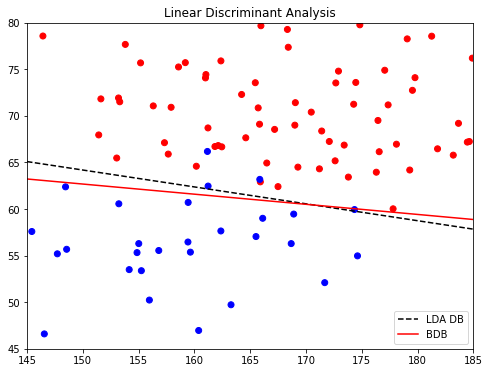

In [5]:
# Rearrange Training data set for LDA fitting
X = np.vstack((male_data, female_data))
y = np.hstack((np.repeat(1, male_data.shape[0]), np.repeat(0, female_data.shape[0])))

# Call LDA function from sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis().fit(X,y)
w = clf.coef_; w0 = clf.intercept_
db = -w0/w[:,1] - w[:,0]/w[:,1] * ht

fig, ax = plt.subplots(figsize=(8,6))
ax.set(xlim=(145, 185), ylim=(45, 80), title='Linear Discriminant Analysis')
colors=np.array(['blue','red'])
ax.scatter(X[:,0], X[:,1], color=colors[y])
ax.plot(ht, db.T, label='LDA DB', color='black', linestyle='--')
ax.plot(ht, bdb.T, label='BDB', color='red')
ax.legend()

#### 2-2-2. QDA in sklearn

위에 만든 남자 여자 키 몸무게 데이터에서 남자와 여자의 class conditional density를 각각 다르게 설정하여 샘플을 생성해보자. 이 경우는 LDA보다 QDA가 더 적합할 것이다. **다만 LDA보다 추정해야할 모수가 4개 더 많으니 ($(K-1)\times D^2$ 만큼 많아진다)** 범주가 많거나 데이터가 적은 경우에는 함부로 쓰지 말자. Test set Error랑 비교해보면 적당히 감을 잡을 것.

QDA train Error:  0.91
LDA train Error:  0.85


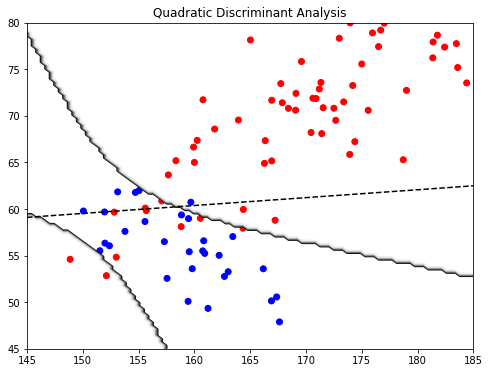

In [6]:
### Generate MVN samples with heterogenous covariance matrix
sigma1 = np.array([[10**2, 0.8*10*8],[0.8*10*8, 8**2]])
sigma2 = np.array([[6**2, -0.7*6*4],[-0.7*6*4, 4**2]])
HW_male = multivariate_normal(mu_male, sigma1)
HW_female = multivariate_normal(mu_female, sigma2)
male_data = HW_male.rvs(N_male)
female_data = HW_female.rvs(N_female)

## Rearrange Training data set for LDA fitting
X = np.vstack((male_data, female_data))
y = np.hstack((np.repeat(1, male_data.shape[0]), np.repeat(0, female_data.shape[0])))

## Call QDA function from sklearn
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis().fit(X,y)
print('QDA train Error: ', clf.score(X,y))

fig, ax1 = plt.subplots(figsize=(8,6))
ax1.set(xlim=(145, 185), ylim=(45, 80), title='Quadratic Discriminant Analysis')
colors=np.array(['blue','red'])
ax1.scatter(X[:,0], X[:,1], color=colors[y])

## Plot LDA Decision Boundary
clf_lda = LinearDiscriminantAnalysis().fit(X,y)
w = clf_lda.coef_; w0 = clf_lda.intercept_
db = -w0/w[:,1] - w[:,0]/w[:,1] * ht
ax1.plot(ht, db.T, color='black', linestyle='--')
print('LDA train Error: ', clf_lda.score(X,y))

## Plot QDA Decision Boundary
r1 = np.linspace(ax1.get_xlim()[0], ax1.get_xlim()[1], 100)
r2 = np.linspace(ax1.get_ylim()[0], ax1.get_ylim()[1], 100)
R1, R2 = np.meshgrid(r1, r2)
R = np.c_[R1.ravel(), R2.ravel()]
Z = clf.predict(R).reshape(R1.shape)
ax1.contour(R1, R2, Z, cmap="Greys_r")

#### 2-2-3. (HW) Multinomial Naive Bayes

feature가 서로 독립이며 단순히 다항분포를 따른다고 가정할 떄 쓰기 좋다. 대표적인 예로 feature가 어떤 count, 횟수일 때 쓰는데, 텍스트 분류에서 자주 쓰인다고 한다. 자세한 예시와 코드는 https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html 여기에서 Multinomial Naive Bayes 항목을 참고하자. 짧은 토막글을 내부 단어에 따라 분류하는 예시를 소개하는데, 한 번 따라해보자.

<br>

### 2-3. Probabilistic Discriminative Approach

3. **Probabilistic: Discriminative (Direct) Approach**<br>
    데이터의 형성 과정까지 추정하는 것은 욕심이라는 것을 인정하고, 애초 목적인 분류에 충실하게 $p(C_k|\mathbf{x})$, 데이터가 주어졌을 때 이게 어느 범주에 속할 지에 대한 분포 이 자체를 아주 그냥 직설적으로 딱 추정해버리는 방법이다. 
    
    두 범주만 있는 데이터를 보자. Generative Approach에서 생각한다면 다음과 같이 쓸 수 있겠다.
    
    \begin{align*} 
    p(C_1|\mathbf{x}) &= \dfrac{p(\mathbf{x}|C_1)p(C_1)}{p(\mathbf{x}|C_1)p(C_1)+p(\mathbf{x}|C_2)p(C_2)} \\
    &= \dfrac{1}{1+ \dfrac{p(\mathbf{x}|C_2)p(C_2)}{p(\mathbf{x}|C_1)p(C_1)}}\\
    &= \dfrac{1}{1+ \exp (-a_1)}\\
    &:= \sigma(a_1)\\
    &(a_1 = \log (\dfrac{p(C_1|\mathbf{x})}{1-p(C_1|\mathbf{x})}) \quad \textbf{log odd})
    \end{align*}
    
    즉 Generative Model에서 전개를 해보니 결국 $p(C_1|\mathbf{x})$는 **log odd $a_1$에 대한 sigmoid 함수**가 된다. 이것을 그려보면 다음과 같이 보여지는데, log odd인 $a$에 대해 마치 **미분 가능한 계단 함수**처럼 보이는 것을 알 수 있다. 
    
    <img src="https://raw.githubusercontent.com/YonseiESC/ESC20-SPRING/master/%EC%84%B8%EC%85%98%20%EC%9E%90%EB%A3%8C/week3/snip02.PNG" width="400">
    <center><figcaption> 출처: PRML p.197 </figcaption></center>
    
    Generative 접근이 "데이터 분포를 이러쿵 저러쿵 추정하다보니 에쿠 sigmoid 함수가 나와버렸어요"라면, **Discriminative 접근은 바로 이런 sigmoid 함수를 바로 추정하는 방법**이다. 대표적인 방법인 Logistic Regression은 log odd를 feature의 선형결합으로 추정한다.
    
    $$log\;odd\;a_k := \log (\dfrac{p(C_k|\mathbf{x})}{1-p(C_k|\mathbf{x})}) = \mathbf{w_k^Tx} $$
    
    또한 $p(C_k|\mathbf{x})$는 다음과 같이 나타낼 수 있다. (헷갈리기 때문에 한 번 노트에 전개해보는 것도 좋은 방법이다.)
    
    $$ p(C_k|\mathbf{x}) = \dfrac{1}{1+\exp(-a_k)} =  \dfrac{1}{1+\exp(-\mathbf{w_k^Tx})}$$
    
    왜 이렇게 하는걸까? 쉽게 말하면 이렇다. Classification이 결국 데이터가 주어졌을 떄 범주의 확률이 높은 범주를 찾는 문제라면, 이를 데이터 $\mathbf{x}$가 주어졌을 때 어떤 범주 k에 속할 확률 $p_k$에 대한 Regression을 하는 문제로 볼 수 있다. 
    
    $$ p_k = \mathbf{w_k^Tx} $$
    
    그러나 이때 일반적인 선형회귀를 사용한다면 에측값이 $[0,1]$ 범위 밖에서 놀아난다는 문제가 있다. 또한 직선을 그어버리니 확률이 어느 구간으로 제한되는 경우도 있다. 때문에 **확률이 0부터 1 사이의 값을 가지게 하고, 어느 기점을 기준으로 명확하게 값이 갈리게 하기 위해 sigmoid 함수를 쓰는 것**이다. 이를 위해 먼저 $\dfrac{p_k}{1-p_k}$로 odd라는 것을 정의하고, 그것의 로그 값에 대해 선형 모델을 피팅하는 것이다.
    
    $$ \log(\dfrac{p_k}{1-p_k}) = \mathbf{w_k^Tx}$$
    
    이 식을 $p_k$에 대해 다시 쓰면 아래와 같이 sigmoid 함수가 나오는 것.
    
    $$  p_k = \dfrac{\exp(\mathbf{w_k^Tx})}{1+\exp(\mathbf{w_k^Tx})} = \dfrac{1}{1+\exp(-\mathbf{w_k^Tx})}$$
    
    이렇게 모델을 fitting을 하였을 경우 다음과 같이 이쁜 그림이 나오는 것을 볼 수 있다. 
    
    <img src="https://raw.githubusercontent.com/YonseiESC/ESC20-SPRING/master/%EC%84%B8%EC%85%98%20%EC%9E%90%EB%A3%8C/week3/snip03.PNG" width="600">
    <center><figcaption> 출처: Introduction to Statistical Learning </figcaption></center>
    
    이를 다 종합해보면, 범주가 K개인 데이터에서, 데이터에 대한 Logistic Regression의 가정은 다음과 같다.
    
    \begin{align*}
    Logistic\;Classifier\; &f(\mathbf{x})=
    \begin{cases}
    C_1 \quad \text{w.p.}\quad p_1\\
    C_2 \quad \text{w.p.}\quad p_2\\
    \vdots\\
    C_K \quad \text{w.p.}\quad p_K\\
    \end{cases}\\
    &where\quad p_k = \dfrac{1}{1+\exp(-\mathbf{w_k^Tx})}
    \end{align*}
    
    이 모든 것을 종합해보면, Logistic Regression에서의 Sampling Density, 모수 $\mathbf{w}$의 입장에서 보면 Likelihood는 다음과 같이 쓸 수 있다.
    
    $$ Likelihood \quad p(t_i|\mathbf{w_1},..,\mathbf{w_K}) = \prod_{k=1}^K \dfrac{1}{1+\exp(-\mathbf{w_k^Tx_i})}$$
    
    $$ Joint\;Likelihood \quad p(\mathbf{t}|\mathbf{w_1},..,\mathbf{w_K}) = \prod_{i=1}^N\prod_{k=1}^K \dfrac{1}{1+\exp(-\mathbf{w_k^Tx_i})}$$
    
    범주가 두 개인 Binary의 경우 ($t_n\in\{0,1\}$)는 간단하게 다음과 같이 쓸 수 있다.
    
    $$ Joint\;Likelihood\;(Binary)\quad p(\mathbf{t}|\mathbf{w}) = \prod_{i=1}^N p_1^{t_n}(1-p_1)^{1-t_n}$$
    
    이 Likelihood를 최대화하는 $\mathbf{w}$를 구해보자. 이 과정이 또 기똥차다. 결론부터 말하자면 이걸 최대화하는 $\mathbf{w}$은 유일하게 하나 존재하나 closed form solution은 존재하지 않으며 (미분해서 하나의 식으로 쨘 나타낼 수 없다) 오직 Newton-Raphson Method 등 수치해석적인 방법으로 구할 수 밖에 없다.

### 2-3-1. Logistic Regression: Iterative Reweighted Least Squares (IRLS)

**지적 호기심이 왕성하고 시간이 남아돌며 두통을 좋아하는게 아니라면 IRLS는 SKIP**

Binary 데이터 ($t_n\in\{0,1\}$)에서 Logistic Regression에서의 Likelihood는 다음과 같이 쓸 수 있다.

$$ Joint\;Likelihood\;(Binary)\quad p(\mathbf{t}|\mathbf{w}) = \prod_{i=1}^N p_1^{t_n}(1-p_1)^{1-t_n} = 
\prod_{i=1}^N \sigma(\mathbf{w^Tx})^{t_n}(1-\sigma(\mathbf{w^Tx}))^{1-t_n} $$

로그를 취해 미분하면 다음과 같은 형태가 되는데, 이걸 Cross Entropy Error이라고 한다.

$$ Err(\mathbf{w}):= -\log p(\mathbf{t}|\mathbf{w}) = -\sum_{i=1}^N(t_i \log \sigma(\mathbf{w^Tx_i}) + (1-t_i)\log (1-\log \sigma(\mathbf{w^Tx_i}))$$

이걸 Cross Entropy라고 부르는 이유는, **이것이 마치 원래 1일 확률이 1이고 0일 확률이 0인 분포를 1일 확률이 $\sigma(\mathbf{w^Tx_i})$이고 0일 확률이 $1-\sigma(\mathbf{w^Tx_i})$인 분포로 근사하는데서 생기는 에러와 같기 때문이다.** 어찌보면 로지스틱 회귀를 한다는 것이 원래 0 또는 1로 하나의 값으로 주어진 target에 대해, 그것이 1일 확률을 $\mathbf{w^Tx_i}$로 근사하는 것이기에, 당연히 로지스틱 회귀에서의 오차가 어떤 분포를 따르는 확률변수를 다른 분포로 근사했을 때의 엔트로피인 Cross Entropy로 나타내지는 것으로 생각할 수 있겠다. 이게 뭔 소리냐 싶으면 PRML 책의 1장에서 Information Theory에 대해서 읽어보자. 그러나 정 궁금한게 아니면 그냥 그렇구나 하고 넘어가는 것이 정신건강에 이롭다.

여기서 중요한 점은, 로지스틱 회귀의 에러는 $\mathbf{w}$에 대해 Concave하긴 한데 Quadratic하지 않다는 것이다. 이것의 의미는 **글로벌 미니멈이 어딘가 하나 있긴 한데, 그걸 미분해서 이쁘게 구할 수 없다**는 것이다. 3장 슬라이드를 다시 뒤적여보면 회귀분석에서 에러는 $\mathbf{w}$에 대해 quadratic하게 의존했다는 것을 볼 수 있다. (대충 $\mathbf{w^Tw}$가 있나는 말) 때문에 미분해서 구할 수 있었지만, 로지스틱 회귀는 $\mathbf{w}$에 대해 quadratic하지 않으므로 미분해서 구할 수는 없다. 때문에 우리는 SGD 등 수치해석적인 방법을 써야하는데, 다행히 로지스틱 회귀는 에러를 두번 미분한 Hessian을 구하기 쉽기 때문에 Newton-Raphson 방법을 쓸 수 있다. **이게 무슨 말인지 헤시안이고 뉴튼이고 나발이고 모르겠다면 그냥 넘어가자. 나도 공부하면서 쓰는거라 내가 무슨 말을 하는지 몰라요. 대충 아 그냥 sklearn에서 로지스틱 회귀 쓰면 걔가 뒤에서 이런거 하겠구나 머신러닝으로 석박사하려면 다변수해석학 수치해석 최적화 등등 뭐 배울거 많구나 졸업 언제하지정도만 감 잡고 넘어갑시다.**

아무튼 이제 이 에러를 $\mathbf{w}$에 대해 미분을 해 Gradient를 구하고, 그걸 또 미분해 Hessian도 구해야 한다. 이때 $\sigma$는 sigmoid 함수인데, sigmoid 함수를 미분하면 $\sigma '(x) = \sigma(x)(1-\sigma(x))$가 된다. (직접 노트에 한번 써보자. 몫의 미분으로 어렵지 않게 보일 수 있다.) 이를 이용하여 미분을 취하면 우리는 다음과 같은 Gradient를 얻는다.

$$ Gradient:\quad \nabla Err(\mathbf{w}) = \sum_{i=1}^N (\sigma(\mathbf{w^Tx_i}) - t_i)\mathbf{x_i} = \mathbf{X^T}(\mathbf{\hat{t}}-\mathbf{t})$$

이를 보면 gradient는 feature $\mathbf{x_i}$ (혹은 $\mathbf{\phi(x_i)}$)라는 벡터에다가 스칼라 오차 $(\sigma(\mathbf{w^Tx_i}) - t_i)$만큼 곱한 형태이다. Hessian은 다음과 같다.

$$ Hessian:\quad \nabla\nabla Err(\mathbf{w}) = \sum_{i=1}^N \sigma(\mathbf{w^Tx_i})(1-\sigma(\mathbf{w^Tx_i}))\mathbf{x_i}\mathbf{x_i^T} = \mathbf{X^TRX}$$
$$ (\mathbf{R}_{ii} = \sigma(\mathbf{w^Tx_i})(1-\sigma(\mathbf{w^Tx_i}))\quad Diagonal Matrix)$$

이걸 보면 왜 closed form solution이 없는지 알 수 있다. Newton-Raphson 방법을 쓸때 에러가 쿼드라틱이면 $\mathbf{w}$를 업데이트하는 식이 하나의 값으로 나온다. 그러나 로지스틱 회귀에서 Hessian을 보면 $\mathbf{R}$안에 애초에 $\mathbf{w}$가 들어가있어, 초기값을 계속 업데이트하는 방식으로 구해야함을 알 수 있다. 이러한 업데이트 과정을 써보면 다음과 같다.

$$ Newton-Raphson\;Update:\quad \mathbf{w}_{new} = \mathbf{w}_{old} - \mathbf{H}^{-1}\nabla Err(\mathbf{w})$$

\begin{align*}
Newton-Raphson\;Update\;(Logistic):\quad \mathbf{w}_{new} &= \mathbf{w}_{old} - \mathbf{X^TRX}^{-1}\mathbf{X^T}(\mathbf{\hat{t}}-\mathbf{t})\\
&= \mathbf{X^TRX}^{-1} (\mathbf{X^TRX}\mathbf{w}_{old} - \mathbf{X^T}(\mathbf{\hat{t}}-\mathbf{t}))\\
&= \mathbf{X^TRX}^{-1}\mathbf{X^TRz}\\
&(where\quad \mathbf{z} = \mathbf{Xw}^{old}-\mathbf{R}^{-1}(\mathbf{\hat{t}}-\mathbf{t}))
\end{align*}

코딩을 위해서는 사실 첫줄까지만 알면 되고, 그 뒤부터의 전개는 이게 왜 이름이 Reweighted Least Sqaures인지를 설명하기 위해 일부러 써놓은 거다 우리 크리스토퍼 비숍 선생님이...님이... $\mathbf{X^TRX}^{-1}\mathbf{X^TRz}$를 자세히보면, 만일 $\mathbf{R}$이 $\mathbf{w}$에 의존해 매번 바뀌는 괴랄한 그런 것이 아니라 만일 상수였으면, 예컨대 항등행렬이었으면 $\mathbf{X^TX}^{-1}\mathbf{X^Tz}$ 이렇게 되는데, 이건 바로 선형회귀에서의 해와 같다. 선형회귀에서의 $\mathbf{w}_{OLS} = \mathbf{X^TX}^{-1}\mathbf{X^Tt}$는 계수 $w_0, w_1,...$에 대한 Normal Equation의 가중평균이다. 로지스틱에서도 마찬가지인데, 다만 그 가중치 $\mathbf{R}$ 안에 $\mathbf{w}$ 매번 정규방정식의 가중치가 바뀐다. 그래서 Iterative Reweigted Least Squares라고 하는 것이다.

이 $\mathbf{R}$은 $\mathbf{t}$의 분산행렬로 볼 수 있다. 로지스틱 회귀는 사실상 어떤 target 데이터 $t_i$가 사실상 1일 확률이 $\sigma(\mathbf{w^Tx_i})$인 베르누이 분포를 따르는 것으로 가정하는 것과 같다. 때문에 그 평균과 분산은 $E(t_i) = \sigma(\mathbf{w^Tx_i})$, $V(t_i) = \sigma(\mathbf{w^Tx_i}) (1-\sigma(\mathbf{w^Tx_i}))$이며, $\mathbf{R}_{ii} = \sigma(\mathbf{w^Tx_i})(1-\sigma(\mathbf{w^Tx_i}))$이기 때문. 즉 $N\times N$ 행렬인 $\mathbf{R}$은 모든 target의 분산을 대각성분에 정리한 대각행렬이다. 만일 내가 정한 $\mathbf{w}$가 어떤 $t_i$에 대해 $\sigma(\mathbf{w^Tx_i})$이 낮으면 분산이 높을 것이며, 따라서 그 높은 분산이 그 데이터에 해당하는 정규방정식에 높은 가중치를 줘서, 결국 이를 낮추는 방향으로 $\mathbf{w}$가 업데이트 되는 것. 아따 복잡하다!

이제 이 모든 과정을 코드로 한번 돌려보자. 실제로는 모든 데이터셋에 대해서 매번 Hessian까지 구하는게 너무 힘드니 그냥 learning rate를 대충 0.01 따위로 작게 줘서 찬찬히 $\mathbf{w}$를 움직인다. 어차피 에러가 Concave하다는 것을 아니까 이렇게 해도 되는 것이다. 

다음은 무려 Srihari 교수님의 ppt에서 소개된 코드를 바탕으로 만들었다. 계수 부분 $\mathbf{w}$와 상수부분 $b$를 따로 나눠 따로 업데이트를 한다.

1. $\mathbf{w}$와 $b$에 아무 값이나 넣어 초기 시작점을 입력한다.
1. log odd를 $z_i = \mathbf{w^Tx_i} + b$로, 이에 대응하는 예측값($\in [0,1]$)을 $\sigma(z_i)=p_i$로 구한다.
1. 전체 Training set에 대해 Cost를 구한다. $L(\mathbf{p}, \mathbf{t}) = - \sum_i^N (t_i\log p_i + (1-t_i)\log (1-p)i)$
1. 다음과 같이 계수를 업데이트한다. 이 과정을 epochs 동안 계속 반복해 loss가 줄어드는지 확인
\begin{align*}
b_{new} &= b_{old} - \eta \sum_i^N (p_i-t_i)\\
\mathbf{w}_{new} &= \mathbf{w}_{old} - \eta \mathbf{X}^T(\mathbf{p} - \mathbf{t})
\end{align*}

[Text(0.5, 0, 'Iteration'), Text(0.5, 1.0, 'Cross Entropy Loss')]

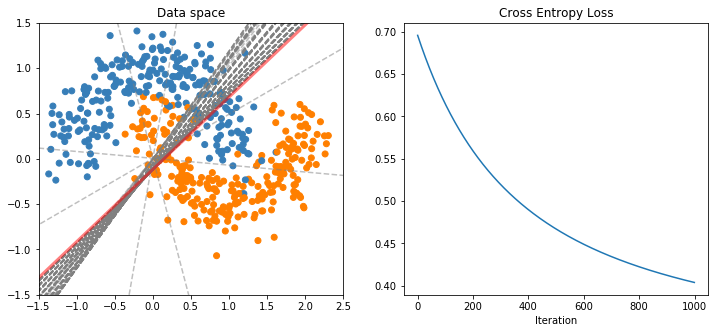

In [7]:
## Generate Toy Sample
import sklearn.datasets
X, Y = sklearn.datasets.make_moons(n_samples=500, noise=0.2)
colors = np.array(['#377eb8', '#ff7f00'])
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax1.scatter(X[:,0], X[:, 1], color=colors[Y])
ax1.set(xlim=(-1.5, 2.5), ylim=(-1.5, 1.5), title='Data space')

X, Y = X.T, Y.reshape(1, Y.shape[0]) # add dimension

## Set learing parameters
epochs = 1000
eta = 0.01

## Define Sigmoid function
def sigmoid(z): 
    return 1/(1+np.exp(-z))

## Initialize coefficients
m = X.shape[1]
w = np.random.randn(X.shape[0], 1)*0.01 # nearly zero but not zero exactly
b = 0

## Iterative Update
losstrack=[]
for epoch in range(epochs):
    # log-odd
    z = np.dot(w.T, X) + b
    
    # prediction by z
    p = sigmoid(z) 
    
    # cross entropy error averaged
    cost = -np.sum(np.multiply(np.log(p), Y) + np.multiply((1-Y), np.log(1-p)))/m 
    losstrack.append(np.squeeze(cost))
    
    # Move coefficients by...
    dz = p-Y
    dw = (1/m) * np.dot(X, dz.T)
    db = (1/m) * np.sum(dz)
    w = w - eta * dw
    b = b - eta * db
    
    # Plot Decision Boundary
    if epoch & 100 == 0:
        db = -b/w[1] - w[0]/w[1] * np.linspace(-3, 3, 100)
        ax1.plot(np.linspace(-3, 3, 100), db.T, label='Decision Boundary', 
                 linestyle='--',color='grey', alpha=0.5)

## Plot Results
db = -b/w[1] - w[0]/w[1] * np.linspace(-3, 3, 100)
ax1.plot(np.linspace(-3, 3, 100), db.T, label='Decision Boundary', 
         linewidth=3, color='red', alpha=0.5)

ax2 = fig.add_subplot(122)
ax2.plot(losstrack)
ax2.set(title='Cross Entropy Loss', xlabel='Iteration')

#### 2-3-1-1. Logistic Regression in sklearn

우리는 그냥 sklearn 쓰자ㅎㅎ

##### Logistic Regression without Feature Extraction

0.88


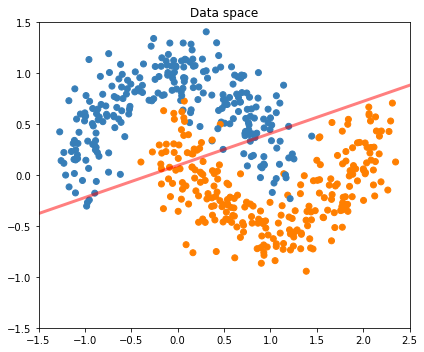

In [8]:
from sklearn.linear_model import LogisticRegression
X, Y = sklearn.datasets.make_moons(n_samples=500, noise=0.2)
clf = LogisticRegression(solver='sag', max_iter=100).fit(X, Y)
clf.predict(X[:100,:]) # return class
clf.predict_proba(X[:100,:]) # return probability
print(clf.score(X, Y)) # return 1- Error rate in Training set

## Plot Decision Surface
fig = plt.figure(figsize=(6,5))
ax1 = fig.add_subplot(111)
ax1.scatter(X[:,0], X[:, 1], color=colors[Y])
ax1.set(xlim=(-1.5, 2.5), ylim=(-1.5, 1.5), title='Data space')
w = clf.coef_; b = clf.intercept_
db = -b/w[:,1] - w[:,0]/w[:,1] * np.linspace(-3, 3, 100)
ax1.plot(np.linspace(-3, 3, 100), db.T, label='Decision Boundary', 
         linewidth=3, color='red', alpha=0.5)
fig.tight_layout()

solver? max_iter? 로지스틱 회귀의 MLE를 찾는 방법이 iterative하게 최적화 문제를 푸는 문제다보니 sklearn은 사용자가 어떤 알고리즘으로 몇 번 반복할 것인지 선택할 수 있게 했다. 클래스가 바이너리냐 멀티이냐, 데이터가 많냐 적냐에 따라 무엇이 나은지 다르니 아래를 읽어보고 잘 골라보자.

<img src="https://raw.githubusercontent.com/YonseiESC/ESC20-SPRING/master/%EC%84%B8%EC%85%98%20%EC%9E%90%EB%A3%8C/week3/snip06.PNG" width="600">
<center><figcaption> 출처: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html </figcaption></center>

##### Logistic Regression with Feature Extraction: Poly=3

회귀분석에서처럼 변수 x1, x2의 다항식으로 확장할 수 있다. 다만 이 경우 Design Matrix에 절편항이 있을 이유가 없으니 빼야 한다. (include_bias=False)

0.954


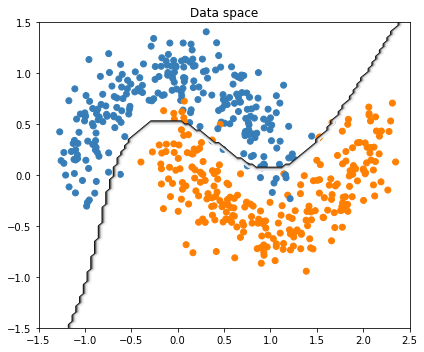

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False) # No column of 1s
X_poly = poly.fit_transform(X)
clf = LogisticRegression().fit(X_poly, Y)
print(clf.score(X_poly, Y)) # return 1- Error rate in Training set

## Plot Results
fig = plt.figure(figsize=(6,5))
ax1 = fig.add_subplot(111)
ax1.scatter(X[:,0], X[:, 1], color=colors[Y])
ax1.set(xlim=(-1.5, 2.5), ylim=(-1.5, 1.5), title='Data space')

## Plot Decision Surface
r1 = np.linspace(ax1.get_xlim()[0], ax1.get_xlim()[1], 100)
r2 = np.linspace(ax1.get_ylim()[0], ax1.get_ylim()[1], 100)
R1, R2 = np.meshgrid(r1, r2)
R = np.c_[R1.ravel(), R2.ravel()]
R_poly = poly.fit_transform(R)
Z = clf.predict(R_poly).reshape(R1.shape)
plt.contour(R1, R2, Z, cmap="Greys_r")

fig.tight_layout()

<br>
<br>

## HOMEWORK

### HW1. 위에 Multinomial Naive Bayes Classifier 예시 해보기

### HW2. 둘 중 하나를 선택.

**선택 1** <br>
아래 링크로 가서 와인의 특성에 따라 와인의 재배종을 분류하는 데이터를 다운<br>
https://www.kaggle.com/brynja/wineuci

1. 데이터 전처리 및 시각화
    1. 데이터 분포를 보고
    1. 결측치 없나 확인하고
    1. feature 결정하고
1. Train-Test set split하기
1. Test에 다음의 모델을 fit해보기
    1. LDA / GDA
    1. Logistic Regression
    1. Logistic Regression with feature expansion (kcv로 차수결정)
1. 각 모델에 대해 Test MSE 보고하고 결과 해석하기

**선택 2** <br>
Multinomial Naive Bayes Classifier로 본인이 직접 인터넷에서 텍스트 데이터를 찾아서 분류해보기. 캐글같은데 뒤지면 머 하나 나올듯?

둘 중 재밌어보이는 것을 선택해서 제출해주세요!